## MSDS 7331 - Case Study 6 - Predicting the Existence of New Particles
Daniel Crouthamel

Sophia Wu

Fabio Savorgnan

Bo Yun

In [6]:
import pandas as pd
import tensorflow as tf 
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import os

# Introduction

The intention of this study is to predict the existence of new particles using a dense neural network.

# Business Understanding

We received an abrupt request from our client in the superconductors industry to help predict the existence of new particles using a dense neural network. The goal should be to maximized accuracy. The client requires a write up on the design of the network, along with information to indicate that the model was trained appropriately.

# Data Evaluation / Engineering

## Read Data

In [7]:
# Load Data
df = pd.read_csv('data/all_train.csv.gz')

## Panda's Profile

In [3]:
# Load Dataset and profile it, only need to do once - so comment out.
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title="New Particles EDA", minimal=True)
# profile.to_file(output_file="NewParticlesEDA.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 504.12it/s]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 29 columns):
 #   Column   Dtype  
---  ------   -----  
 0   # label  float64
 1   f0       float64
 2   f1       float64
 3   f2       float64
 4   f3       float64
 5   f4       float64
 6   f5       float64
 7   f6       float64
 8   f7       float64
 9   f8       float64
 10  f9       float64
 11  f10      float64
 12  f11      float64
 13  f12      float64
 14  f13      float64
 15  f14      float64
 16  f15      float64
 17  f16      float64
 18  f17      float64
 19  f18      float64
 20  f19      float64
 21  f20      float64
 22  f21      float64
 23  f22      float64
 24  f23      float64
 25  f24      float64
 26  f25      float64
 27  f26      float64
 28  mass     float64
dtypes: float64(29)
memory usage: 1.5 GB


In [9]:
df.describe()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,...,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,5.001256e-01,1.612528e-02,4.770022e-04,2.686578e-05,1.056081e-02,-1.050026e-04,2.765919e-03,1.815953e-02,2.510948e-05,4.345870e-04,...,1.164789e-02,-1.127097e-04,7.686731e-05,2.909202e-04,1.228774e-02,9.778378e-03,5.269844e-03,-1.760961e-03,1.533136e-02,1.000107e+03
std,5.000000e-01,1.004417e+00,9.974864e-01,1.000080e+00,9.956003e-01,9.998670e-01,1.000957e+00,9.867746e-01,9.965867e-01,1.000007e+00,...,1.002725e+00,1.000038e+00,1.000033e+00,1.000170e+00,1.010477e+00,1.005418e+00,1.009990e+00,9.844511e-01,9.822799e-01,3.534255e+02
min,0.000000e+00,-1.960549e+00,-2.365355e+00,-1.732165e+00,-9.980274e+00,-1.732137e+00,-1.054221e+00,-3.034787e+00,-2.757853e+00,-1.732359e+00,...,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.631608e+00,-4.729473e+00,-2.062223e+01,-3.452634e+00,-2.632761e+00,5.000000e+02
25%,0.000000e+00,-7.288206e-01,-7.332548e-01,-8.656704e-01,-6.092291e-01,-8.658025e-01,-1.054221e+00,-7.566092e-01,-7.014146e-01,-8.656543e-01,...,-7.423630e-01,-7.206846e-01,-8.656855e-01,-5.736825e-01,-5.417942e-01,-5.115522e-01,-3.543870e-01,-6.925097e-01,-7.943804e-01,7.500000e+02
50%,1.000000e+00,-3.930319e-02,8.523957e-04,3.199154e-04,1.963316e-02,-5.070131e-04,-5.983562e-03,-1.499527e-01,-1.067553e-04,1.384781e-03,...,-8.992496e-02,-6.735953e-05,-4.424527e-04,-5.736825e-01,-1.602760e-01,-3.144032e-01,-3.265228e-01,-3.570301e-01,-8.828640e-02,1.000000e+03
75%,1.000000e+00,6.900799e-01,7.347832e-01,8.659464e-01,6.798818e-01,8.657646e-01,8.504885e-01,7.686690e-01,7.013194e-01,8.665976e-01,...,6.423185e-01,7.204921e-01,8.659566e-01,-5.736825e-01,4.812194e-01,1.634892e-01,-2.337671e-01,4.753128e-01,7.610846e-01,1.250000e+03
max,1.000000e+00,4.378282e+00,2.365287e+00,1.732370e+00,4.148023e+00,1.731978e+00,4.482618e+00,3.720345e+00,2.758590e+00,1.731450e+00,...,5.866367e+00,2.282217e+00,1.732740e+00,1.743123e+00,7.293420e+00,9.333287e+00,1.499064e+01,5.277313e+00,4.444690e+00,1.500000e+03


## Missing Data Evaluation

Below we find that we have no missing data.

In [10]:
# Find if any columns have missing values
df.isnull().sum()

# label    0
f0         0
f1         0
f2         0
f3         0
f4         0
f5         0
f6         0
f7         0
f8         0
f9         0
f10        0
f11        0
f12        0
f13        0
f14        0
f15        0
f16        0
f17        0
f18        0
f19        0
f20        0
f21        0
f22        0
f23        0
f24        0
f25        0
f26        0
mass       0
dtype: int64

## Feature Histograms

array([[<AxesSubplot:title={'center':'# label'}>,
        <AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>,
        <AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'f3'}>],
       [<AxesSubplot:title={'center':'f4'}>,
        <AxesSubplot:title={'center':'f5'}>,
        <AxesSubplot:title={'center':'f6'}>,
        <AxesSubplot:title={'center':'f7'}>,
        <AxesSubplot:title={'center':'f8'}>],
       [<AxesSubplot:title={'center':'f9'}>,
        <AxesSubplot:title={'center':'f10'}>,
        <AxesSubplot:title={'center':'f11'}>,
        <AxesSubplot:title={'center':'f12'}>,
        <AxesSubplot:title={'center':'f13'}>],
       [<AxesSubplot:title={'center':'f14'}>,
        <AxesSubplot:title={'center':'f15'}>,
        <AxesSubplot:title={'center':'f16'}>,
        <AxesSubplot:title={'center':'f17'}>,
        <AxesSubplot:title={'center':'f18'}>],
       [<AxesSubplot:title={'center':'f19'}>,
        <AxesSubplot:title={'center'

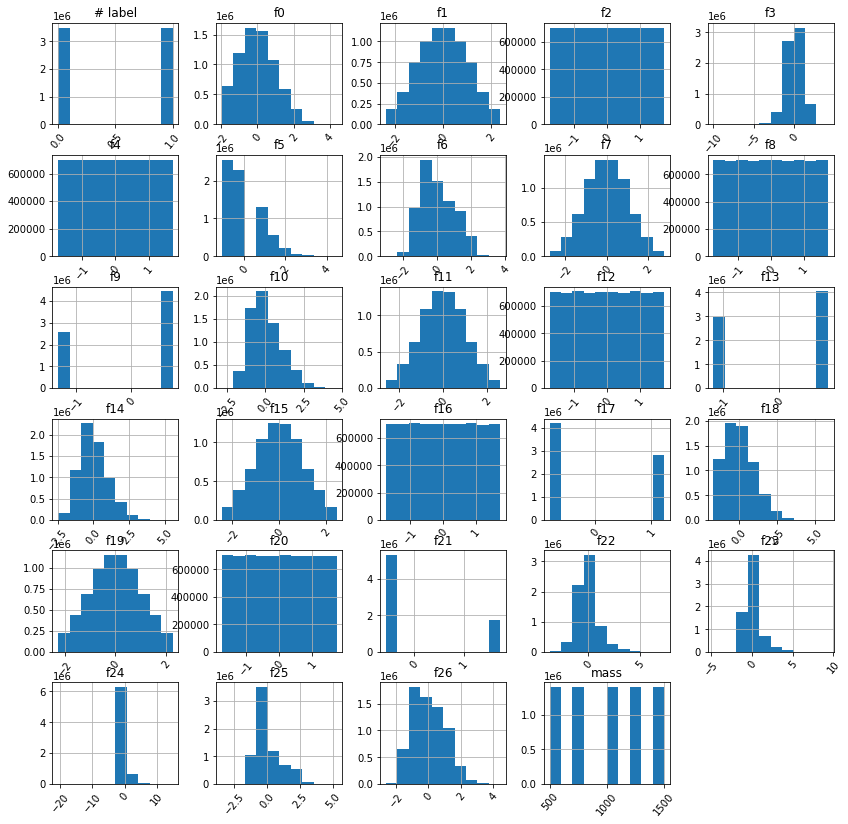

In [11]:
df.hist(figsize=(14,14), xrot=50)

## Target Evaluation

In [12]:
# Determine if target is balanced

df["# label"].value_counts()

1.0    3500879
0.0    3499121
Name: # label, dtype: int64

The information found in the Pandas Profile report and historgrams above reveal the following information:

* 7 Million rows of data
* 28 features and 1 target
* No missing data
* Our reponse, # label, is nearly balanced, close to 50%.
* We have 4 features in which there are only two values, which we could consider treating as binary/categorical.
  * f9
  * f13
  * f17
  * f21
* The remaing features are distrubuted normally or have a uniform distribution.

In [13]:
# Relabel target
df.rename(columns={'# label': 'target'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 29 columns):
 #   Column  Dtype  
---  ------  -----  
 0   target  float64
 1   f0      float64
 2   f1      float64
 3   f2      float64
 4   f3      float64
 5   f4      float64
 6   f5      float64
 7   f6      float64
 8   f7      float64
 9   f8      float64
 10  f9      float64
 11  f10     float64
 12  f11     float64
 13  f12     float64
 14  f13     float64
 15  f14     float64
 16  f15     float64
 17  f16     float64
 18  f17     float64
 19  f18     float64
 20  f19     float64
 21  f20     float64
 22  f21     float64
 23  f22     float64
 24  f23     float64
 25  f24     float64
 26  f25     float64
 27  f26     float64
 28  mass    float64
dtypes: float64(29)
memory usage: 1.5 GB


# Modeling Preparations

The business objective asked of us is to use a neural network and optimize for accuracy. However, before doing that we will sample a small set of data and build a simple logistic regression model to see what the accuracy of the model is. Establish a baseline.

## Create training and test sets

In [14]:
df_small = df.sample(frac=0.1, random_state=1).copy(deep=True)

scaler = StandardScaler()

X = df_small.loc[:, df_small.columns != 'target'].values

y = df_small['target'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=30)

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression for baseline model

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))


0.8370735930735931


### Gridsearch LR
- The best accuracy score observed is 83.6%. 
- Best Hyperparameters: {'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}
- We will compare this result to the Neural Network result below.

In [11]:
import warnings
warnings.filterwarnings("ignore")  # ignoring warnings

# Model definition
model = LogisticRegression()

# Define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-3, 1e-2, 1e-1, 1, 10, 100]

# Define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=5)

# Execute search
result = search.fit(X, y)

# Summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8366814285714286
Best Hyperparameters: {'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}


### Gridsearch LR feature importance 
- Feature #6 and Feature #27 are the most important variables in the LR model. 
- Even though we do not have a domain expertise on these important features, we will communicate these findings to our client for their reference. 
- Depending on how much the interpretability of the model affects our client's understanding of the business performance, this information can be useful. 

Feature: 0, Score: 0.51011
Feature: 1, Score: -0.00452
Feature: 2, Score: -0.00040
Feature: 3, Score: 0.46035
Feature: 4, Score: 0.00083
Feature: 5, Score: -0.02481
Feature: 6, Score: 1.48715
Feature: 7, Score: 0.00461
Feature: 8, Score: 0.00445
Feature: 9, Score: 0.09910
Feature: 10, Score: 0.45446
Feature: 11, Score: 0.01179
Feature: 12, Score: 0.00235
Feature: 13, Score: 0.10771
Feature: 14, Score: 0.19335
Feature: 15, Score: 0.00393
Feature: 16, Score: 0.00455
Feature: 17, Score: 0.06070
Feature: 18, Score: 0.10612
Feature: 19, Score: -0.00532
Feature: 20, Score: 0.00241
Feature: 21, Score: 0.03466
Feature: 22, Score: -0.03248
Feature: 23, Score: -0.11218
Feature: 24, Score: -0.00915
Feature: 25, Score: 0.07303
Feature: 26, Score: 0.35706
Feature: 27, Score: -0.97617


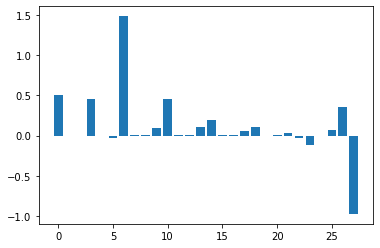

In [12]:
import matplotlib.pyplot as plt

# get importance
importance = lr.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Model Building & Evaluation

Below we create a grid style apporach in finding the best parameters for the neural network. We'll attempt to determine an optimal number of hidden layers and the number of nodes in each layer. Note, we'll use a dropout layer for every hidden layer used. The final layer at the end will use a sigmoid activation function, since we are dealing with a binary classification problem.

Additionally, we'll use the Adam optimizer in SGD and BinaryCrossEntropy for the loss function. Early stopping is used to prevent overfitting, and will stop training once there is no longer improvement in the validation set. This is defined with the patience parameter (set at 3), along with an min_delta parameter (set at 0.0002). Early stopping will occur if we don't see any improvement greater than .0002 in 3 tries.

## Use full data set

In [15]:
scaler = StandardScaler()

X = df.loc[:, df.columns != 'target'].values

y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=30)

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Gridsearch NN

Note that the below takes over an hour to run. The best esitmator and model is saved off if needed. A tensorboard log is also saved (see callbacks).

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

# # Print current path
# print(os.getcwd())
# print(run_logdir)

tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[28]):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
        model.add(tf.keras.layers.Dropout(.2, input_shape=(2,)))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    optimizer = tf.keras.optimizers.Adam()
    loss = tf.keras.losses.BinaryCrossentropy()
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

keras_reg = tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)

from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 500)
}

safety = EarlyStopping(monitor='val_loss', patience=3, min_delta=2e-4)

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=5, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=500,
                  validation_data=(X_test, y_test),
                  callbacks=[tensorboard_cb, safety], batch_size=1000)


# model = rnd_search_cv.best_estimator_.model
# model.save('models/particle_random_cv')

Epoch 1/500
3127/3127 [==============================] - 14s 4ms/step - loss: 0.3915 - accuracy: 0.8223 - val_loss: 0.3661 - val_accuracy: 0.8363
Epoch 2/500
3127/3127 [==============================] - 10s 3ms/step - loss: 0.3654 - accuracy: 0.8367 - val_loss: 0.3652 - val_accuracy: 0.8367
Epoch 3/500
3127/3127 [==============================] - 10s 3ms/step - loss: 0.3653 - accuracy: 0.8367 - val_loss: 0.3652 - val_accuracy: 0.8370
Epoch 4/500
3127/3127 [==============================] - 10s 3ms/step - loss: 0.3653 - accuracy: 0.8367 - val_loss: 0.3652 - val_accuracy: 0.8369
Epoch 5/500
48855/48855 [==============================] - 94s 2ms/step - loss: 0.3657 - accuracy: 0.8367
Epoch 1/500
3127/3127 [==============================] - 13s 4ms/step - loss: 0.4186 - accuracy: 0.8056 - val_loss: 0.3668 - val_accuracy: 0.8362
Epoch 2/500
3127/3127 [==============================] - 9s 3ms/step - loss: 0.3660 - accuracy: 0.8364 - val_loss: 0.3652 - val_accuracy: 0.8369
Epoch 3/500
3127/31

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000020AC1592B20>,
                   n_iter=5,
                   param_distributions={'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  5...
       404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416,
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 47

In [21]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)

{'n_neurons': 453, 'n_hidden': 2}
-0.2610002855459849


In [27]:
model = rnd_search_cv.best_estimator_.model
model.save('models/particle_random_cv_best_model')

INFO:tensorflow:Assets written to: models/particle_random_cv_best_model\assets


In [16]:
# This can be used to load best model from the above

model = tf.keras.models.load_model('models/particle_random_cv_best_model')

In [17]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 453)               13137     
_________________________________________________________________
dropout_29 (Dropout)         (None, 453)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 453)               205662    
_________________________________________________________________
dropout_30 (Dropout)         (None, 453)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 454       
Total params: 219,253
Trainable params: 219,253
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.evaluate(X_test, y_test, batch_size=1000)

2310/2310 [==============================] - 4s 1ms/step - loss: 0.2608 - accuracy: 0.8830


[0.2607980966567993, 0.8829684257507324]

## Model Summary

We can see above that the grid search found an optimal configuration of 2 hidden layers and 453 nodes in each layer, achieving an accuracy of 88.3%.

Let's produce a final model and then perform some predictions on our validation set. We split our data into 3 parts below, train (60%), test (20%) and validation (20%). The nuerul network is configured to have 2 layers, 128 nodes, 2 drop out layers, and a sigmoid activation function at teh output layer. We'll again use the Adam optimizer and BinaryCrossEntropy for the loss function. The same early stopping parameters defined above are used.

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

scaler = StandardScaler()

X = df.loc[:, df.columns != 'target'].values

y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

final_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

final_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

tensorboard_cb = tf.keras.callbacks.TensorBoard(get_run_logdir())

safety = EarlyStopping(monitor='val_loss', patience=3, min_delta=2e-4)

final_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), 
          callbacks=[tensorboard_cb, safety], batch_size=1000)

final_model.evaluate(X_val, y_val, batch_size=1000)

Epoch 1/100
4200/4200 [==============================] - 15s 3ms/step - loss: 0.2987 - accuracy: 0.8620 - val_loss: 0.2774 - val_accuracy: 0.8739
Epoch 2/100
4200/4200 [==============================] - 12s 3ms/step - loss: 0.2815 - accuracy: 0.8720 - val_loss: 0.2731 - val_accuracy: 0.8763
Epoch 3/100
4200/4200 [==============================] - 12s 3ms/step - loss: 0.2781 - accuracy: 0.8739 - val_loss: 0.2701 - val_accuracy: 0.8779
Epoch 4/100
4200/4200 [==============================] - 12s 3ms/step - loss: 0.2762 - accuracy: 0.8750 - val_loss: 0.2689 - val_accuracy: 0.8786
Epoch 5/100
4200/4200 [==============================] - 13s 3ms/step - loss: 0.2749 - accuracy: 0.8757 - val_loss: 0.2681 - val_accuracy: 0.8793
Epoch 6/100
4200/4200 [==============================] - 12s 3ms/step - loss: 0.2743 - accuracy: 0.8762 - val_loss: 0.2673 - val_accuracy: 0.8794
Epoch 7/100
4200/4200 [==============================] - 11s 3ms/step - loss: 0.2738 - accuracy: 0.8764 - val_loss: 0.2669 -

[0.2662472724914551, 0.8806049823760986]

## Predicting the Existence of New Particles

Above we see that our final model performed well on the test, acheiving an accuracy of 88.1%.

Let's examine how well our Neural Network performs by doing some predictions on our validation set and comparing the results to the actual labels. The classificatoin report shows good scores with respect to precision, recall, and F1-score across the board.

In [15]:
from sklearn.metrics import confusion_matrix

y_pred = (final_model.predict(X_val) > 0.5).astype('int32')
confusion_matrix(y_val, y_pred)

array([[595884, 104664],
       [ 62489, 636963]], dtype=int64)

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred, target_names=["No","New Particle (Yes)"]))

                    precision    recall  f1-score   support

                No       0.91      0.85      0.88    700548
New Particle (Yes)       0.86      0.91      0.88    699452

          accuracy                           0.88   1400000
         macro avg       0.88      0.88      0.88   1400000
      weighted avg       0.88      0.88      0.88   1400000



## Tensorsboard

Tensboard can be used to show the how the model is training. Below we output the accuracy and loss curves for our training and validation sets. Notice that the curves stop once our early stopping criteria is met.

In [ ]:
%load_ext tensorboard

%tensorboard --logdir logs

In [22]:
from tensorboard import notebook
notebook.display()

Selecting TensorBoard with logdir logs (started 1 day, 4:10:55 ago; port 6006, pid 44604).


# Conclusion

We examined using a neural network to predict the existence of new particles. We found that the neural network performed well on the validation set, and that the model was able to accurately predict the existence of new particles with 88% accuracy. However, it was also shown that Logistic Regression could perform almost as well, with an accuracy of 83.6%. Depending on resources and other constraints, using s model that can be trained faster might be more appropriate.
